### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [62]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

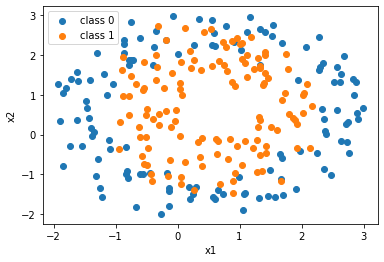

In [63]:
# Load dataset
data = pd.read_csv("q3_data.csv")

x = data.values[:, :2]
y = data.values[:, -1].astype(int)

m = x.shape[0]
n = x.shape[1]
freq_0 = np.bincount(y)[np.nonzero(np.bincount(y))[0]][0]
x0 = np.ones((freq_0, n))
x1 = np.ones((m-freq_0, n))

idx_0 = 0
idx_1 = 0
for i in range(0, m):
    if y[i] == 0:
        x0[idx_0] = x[i]
        idx_0 = idx_0 + 1
    else:
        x1[idx_1] = x[i]
        idx_1 = idx_1 + 1

# Plot points
plt.figure()
plt.scatter(x0[:,0], x0[:, 1], label='class 0')
plt.scatter(x1[:,0], x1[:, 1], label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [64]:
# Transform points to 28D space
def map_feature(x):
    x1 = x[:,0]
    x2 = x[:,1]
    pwr = 6
    result = np.ones(x.shape[0])[:, np.newaxis]
    for i in range(1, pwr+1):
        for j in range(i+1):
            result = np.hstack((result, np.multiply(np.power(x1, i-j), np.power(x2, j))[:, np.newaxis]))
    return result

## P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

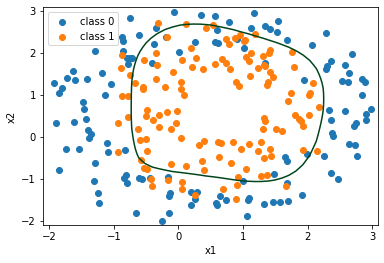

In [65]:
# Define your functions here
def sigmoid(x):
    return 1/(1+np.exp(-x))

def cost_function(w_t, X_t, y_t, lambda_t):
    m = len(y)
    cost = (1/m)*(-y_t.T @ np.log(sigmoid(X_t @ w_t)) - (1- y_t.T) @ np.log(1 - sigmoid(X_t @ w_t)))
    reg_funct = (lambda_t/(2*m)) * (w_t[1:].T @ w_t[1:])
    cost = cost + reg_funct
    return cost

def calculate_gradients(w, X, y, lambda_t):
    m = len(y)
    gradient = np.zeros([m, 1])
    gradient = (1/m) * X.T @ (sigmoid(X @ w) - y)
    gradient[1:] = gradient[1:] + (lambda_t/m) * w[1:]
    return gradient
    
   
# cost = cost_function(w, x, y, lambdaa)

def logistic_regpression_regularized(x, y, w, lambdaa, learning_rate, iterations):
    cost_hist = []
    c_prev = np.inf
    for i in range(iterations):
        w = w - (learning_rate*calculate_gradients(w, x, y, lambdaa))
        cost = cost_function(w, x, y, lambdaa)
        if c_prev - cost < 5e-7:
            return w, cost, i
        c_prev = cost
        cost_hist.append(cost)
    return w, cost_hist, i


# Plot decision boundary
def map_mesh(u, v):
    degree = 6
    res = np.ones(u.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (u ** (i-j)) * (v ** j)))  
    return res 



X = map_feature(x)
n = X.shape[1]
w = np.zeros((n, 1))
y = y[:, np.newaxis]
lambdaa = 1
learning_rate = 0.0001
iterations = 10000
w, cost_hist, i = logistic_regpression_regularized(X, y, w, lambdaa, learning_rate, iterations)

def decision_boundary(x, w, color):
    x1_min, x1_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
    x2_min, x2_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1

    if x2_min < x1_min:
        x_min = x2_min
    else:
        x_min = x1_min

    if x2_max > x1_max:
        x_max = x2_max
    else:
        x_max = x1_max

    # max into a square    
    u = np.linspace(x_min, x_max, 50)
    v = np.linspace(x_min, x_max, 50)
    U, V = np.meshgrid(u, v)
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    X_mesh = map_mesh(U, V)
    Z = X_mesh.dot(w)

    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    plt.contour(U, V, Z, levels=[0],cmap=color)


# plt.figure()
plt.figure()
plt.scatter(x0[:,0], x0[:, 1], label='class 0')
plt.scatter(x1[:,0], x1[:, 1], label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
color = "Greens_r"
decision_boundary(x, w, color)
plt.legend()

plt.show()


## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100]$
- draw the decision boundaries


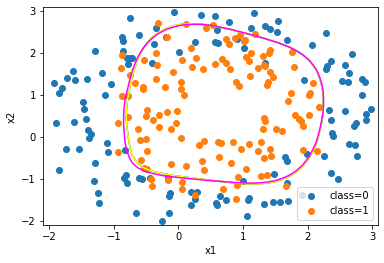

In [76]:
# lambda = 0
lambdaa=0
w_0, cost_hist_0, i_0 = logistic_regpression_regularized(X, y, w, lambdaa, learning_rate, iterations)
# lambda = 1
lambdaa=1
w_1, cost_hist_1, i_1 = logistic_regpression_regularized(X, y, w, lambdaa, learning_rate, iterations)
# lambda = 100
lambdaa=100
w_100, cost_hist_100, i_100 = logistic_regpression_regularized(X, y, w, lambdaa, learning_rate, iterations)

plt.figure()
plt.scatter(x0[:,0], x0[:, 1], label='class 0')
plt.scatter(x1[:,0], x1[:, 1], label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
color_1, color_2, color_3 = "summer", "autumn_r", "spring"
decision_boundary(x, w_0, color_1) #green
decision_boundary(x, w_1, color_2) #yellow
decision_boundary(x, w_100, color_3) #pink
plt.legend(['class=0', 'class=1','lambda=0', 'lambda=1', 'lambda=100'])
# I wasn't sure how to label the contour plot


Answer for part (d) here: Lambda=0 and Lambda=1 have the same decision boundary. lambda=100 increases the decision boundary by a bit. I think this has to do with my other parametes: learning rate and iterations. Because I set them very low and very high, respectively, it greatly reduces the sensitivity of my lambda.

